## **Installation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

## **Data Import**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

## **SG Section**

In [3]:
print(f'There are {len(df["player_id"].unique())} players')

There are 30 players


In [4]:
shot_1 = df.loc[df['shot'] == 1]
avg_round = shot_1.groupby(['player_id', 'round']).agg({'hole_score': 'sum'}).reset_index()
avg_round

,player_id,round,hole_score
0,1810,1,68
1,1810,2,70
2,1810,3,67
3,1810,4,71
4,2206,1,73
...,...,...,...
115,31323,4,66
116,33141,1,64
117,33141,2,71
118,33141,3,72


# **Average Score for each Round**

In [5]:
avg_round.groupby(['round'])['hole_score'].mean().reset_index()

,round,hole_score
0,1,69.066667
1,2,69.200000
2,3,70.566667
3,4,70.333333


# **SG per Player per Round**

In [6]:
import pandas as pd

# Assuming df is your DataFrame
avg_round = shot_1.groupby(['player_id', 'round']).agg({'hole_score': 'sum'}).reset_index()

# Define a function to calculate the new column values based on conditions
def calculate_new_column(row):
    if row['round'] == 1:
        return 69.066667 - row['hole_score']
    elif row['round'] == 2:
        return 69.2 - row['hole_score']
    elif row['round'] == 3:
        return 70.566667 - row['hole_score']
    elif row['round'] == 4:
        return 70.33333 - row['hole_score']
    else:
        return None  # Handle other round values if needed

# Apply the function to create the new column
avg_round['strokes gained for that round'] = avg_round.apply(calculate_new_column, axis=1)

# Display the resulting DataFrame
avg_round.sort_values(by='strokes gained for that round', ascending=False)


,player_id,round,hole_score,strokes gained for that round
38,22371,3,64,6.566667
85,25804,2,64,5.200000
116,33141,1,64,5.066667
70,24781,3,66,4.566667
50,23623,3,66,4.566667
...,...,...,...,...
77,24925,2,74,-4.800000
12,6567,1,74,-4.933333
41,22405,2,75,-5.800000
89,26476,2,77,-7.800000


## **SG FOR TOTAL TOURNAMENT**

c:\Users\decla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


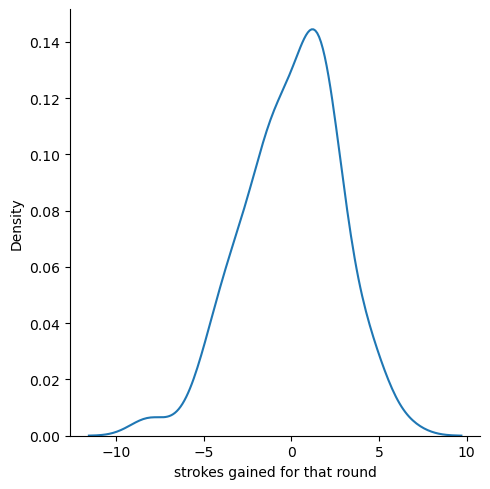

In [13]:
sns.displot(avg_round['strokes gained for that round'],  kind='kde')

## **Sci Pi Fit**

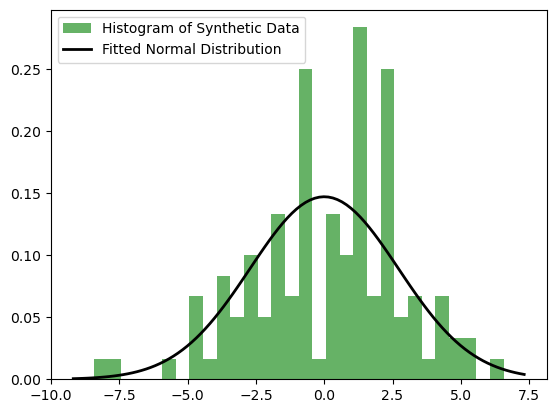

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters of the normal distribution
mean, std = 0, 1  # You can adjust these parameters based on your desired shape

# Generate synthetic data from the normal distribution
hole_scores = avg_round['strokes gained for that round']

# Fit the normal distribution to the synthetic data
params = norm.fit(hole_scores)

# Now you can use the parameters for further analysis or generating random samples

# Optional: Plot the histogram of the synthetic data and the fitted normal distribution
plt.hist(hole_scores, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Synthetic Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.legend()
plt.show()


In [10]:
print("Fitted Mean:", params[0])
print("Fitted Standard Deviation:", params[1])

Fitted Mean: -6.666666673519709e-07
Fitted Standard Deviation: 2.715234796477533


## **SG PER ROUND**

c:\Users\decla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


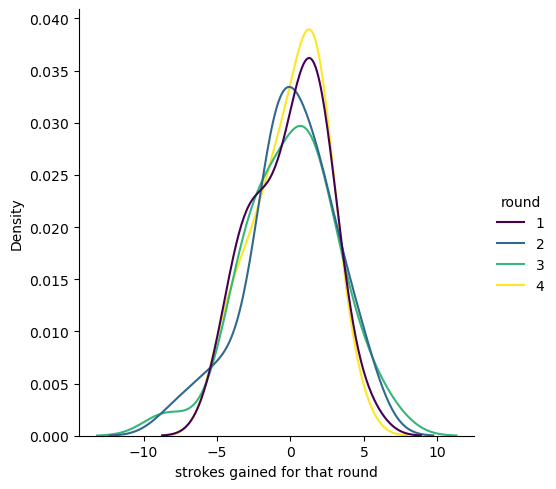

In [11]:
sns.displot(data=avg_round, x='strokes gained for that round', kind='kde',hue = 'round',  palette='viridis')


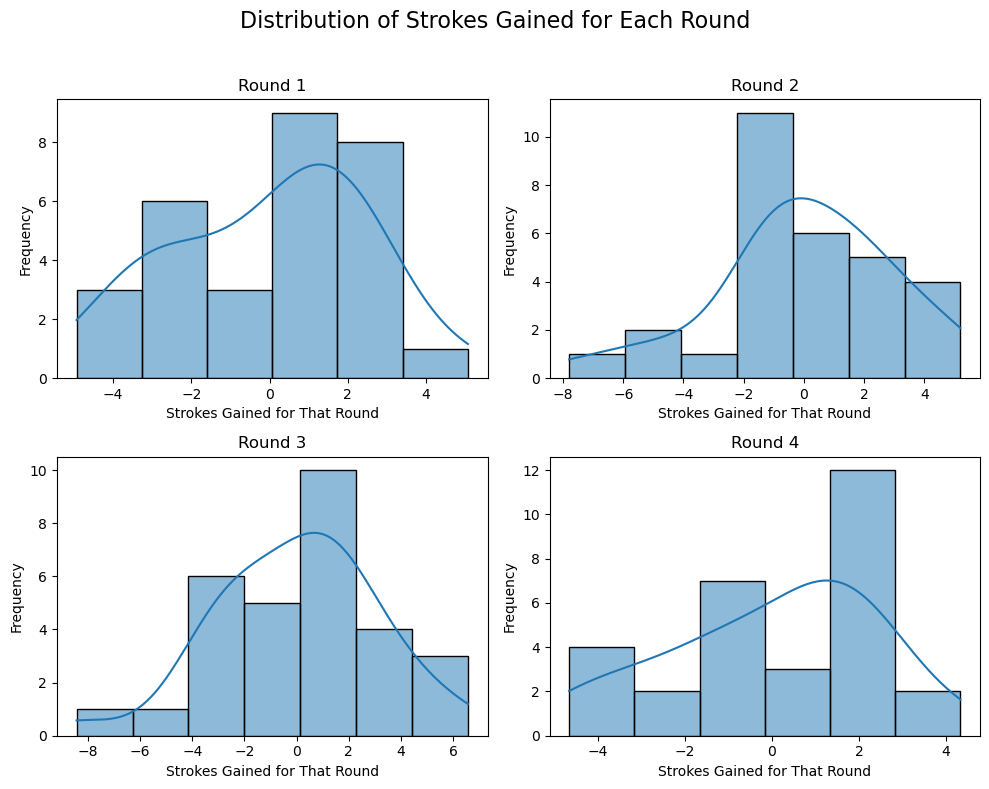

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming avg_round is your DataFrame
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of Strokes Gained for Each Round', fontsize=16)

# Define rounds and corresponding axes indices
rounds = sorted(avg_round['round'].unique())
axes_indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

for rnd, (i, j) in zip(rounds, axes_indices):
    data_subset = avg_round[avg_round['round'] == rnd]
    sns.histplot(data=data_subset, x='strokes gained for that round', kde=True, ax=axes[i, j])
    axes[i, j].set_title(f'Round {rnd}')
    axes[i, j].set_xlabel('Strokes Gained for That Round')
    axes[i, j].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

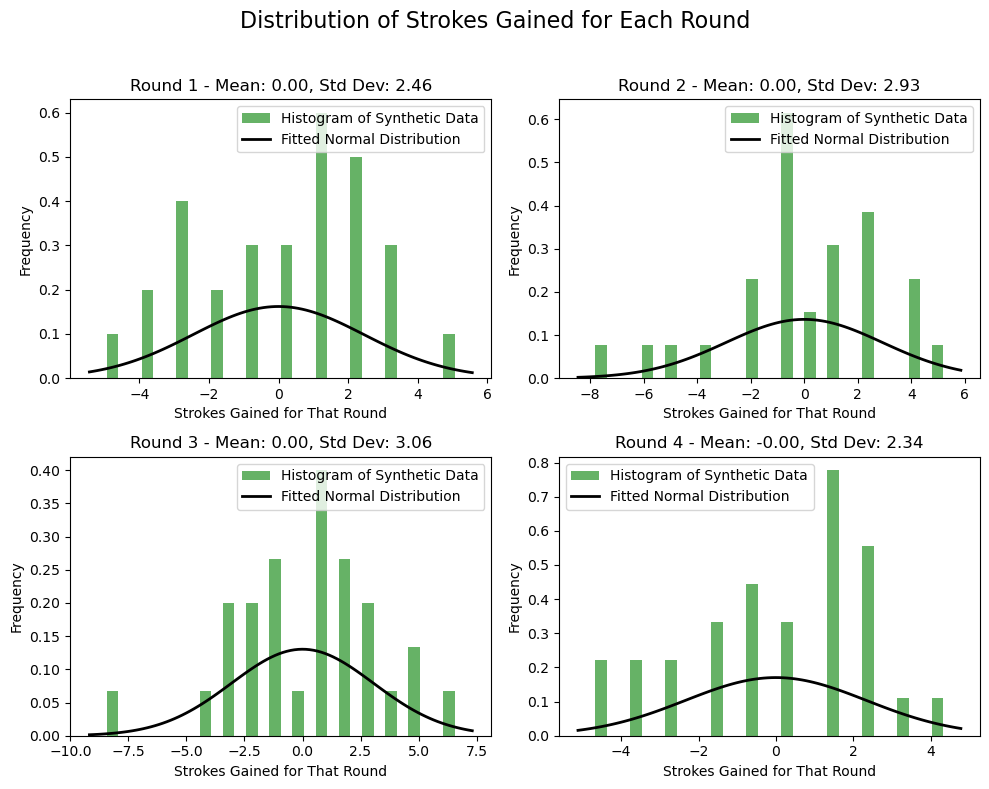

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Assuming avg_round is your DataFrame
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of Strokes Gained for Each Round', fontsize=16)

# Define rounds and corresponding axes indices
rounds = sorted(avg_round['round'].unique())
axes_indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

for rnd, (i, j) in zip(rounds, axes_indices):
    data_subset = avg_round[avg_round['round'] == rnd]

    # Replace sns.histplot with custom histogram and fitted normal distribution plot
    hole_scores = data_subset['strokes gained for that round']

    # Fit the normal distribution to the synthetic data
    params = norm.fit(hole_scores)

    # Plot the histogram of the synthetic data and the fitted normal distribution
    axes[i, j].hist(hole_scores, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Synthetic Data')
    xmin, xmax = axes[i, j].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, *params)
    axes[i, j].plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

    # Set title and labels
    axes[i, j].set_title(f'Round {rnd} - Mean: {params[0]:.2f}, Std Dev: {params[1]:.2f}')
    axes[i, j].set_xlabel('Strokes Gained for That Round')
    axes[i, j].set_ylabel('Frequency')
    axes[i, j].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
